# COGS 108 - Final Project Team 40

# Overview ***

*Fill in your overview here*
*Include 3-4 sentences summarizing your group’s project*

# Names

- Fenglin Zhang
- Justin Villafuerte
- Natapong Stephen Jarrell
- Ananya Narurkar
- Arvind Saripalli

# Group Members IDs ***

- A########
- A########
- A14929717
- A13520437
- A14981787

# Research Question

Can we predict future gasoline prices in the United States? What are some measures that are correlated with United States gas prices?

## Background and Prior Work ***

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


We expect to be able to fit an accurate model to historical gasoline prices. We also expect that gasoline prices may be highly correlated with various measures of the economy as well as google trends data.

# Dataset(s) ***

## Gas Prices Dataset ***

The US Energy Information Administration ([EIA](https://www.eia.gov)) provides data for gasoline prices in the United States. Our goal in this project is to use this dataset to predict future Gas Prices.

- Dataset Name: Weekly Retail Gasoline and Desiel Prices from the US Energy Information Administration 
- Link to the dataset: [Gas prices dataset](https://www.eia.gov/dnav/pet/pet_pri_gnd_dcus_nus_m.htm)
- Number of observations:

How many data points and from when??

## S&P 500

The S&P 500 which is a stock that measures 500 large companies and is used as a measure of the strength of the economy. The dataset goes as far back as 1950-01-03 to present day and has measures for everyday that the stock market was open.

- Dataset Name: S&P 500
- Link to the dataset: [Yahoo Finance S&P](https://finance.yahoo.com/quote/%5EGSPC/history?period1=-630950400&period2=1556262000&interval=1d&filter=history&frequency=1d)
- Number of observations: ~17000 data points

## NASDAQ ***

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

## Dow Jones Industrial Average

The [Dow Jones Industrial Average](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average) is a stock market index that indicates the value of 30 large, publicly owned companies based in the United States, and how they have traded in the stock market during various periods of time. The dataset that we found from Yahoo Finance containes weekly measures of the Dow Jones Industrial Averiage from January 1985 to the present. We take this data as a crude estimation of [how the economy is doing](https://www.forbes.com/sites/mikepatton/2016/01/27/the-dow-jones-industrial-average-and-gdp-from-1930-to-2015/#6f3faf23067d).

- Dataset Name: Dow Jones Industrial Average
- Link to the dataset: [Yahoo Finance DJIA](https://finance.yahoo.com/quote/%5EDJI/history?period1=475833600&period2=1555398000&interval=1mo&filter=history&frequency=1mo)
- Number of observations: Weekly data since 1985 is ~1700 data points

## Google Trends Data

Google trends is a service from Google that provides insight into popularity of search terms on Google search. For this project, we queried relative popularity over time of some specified search terms. For example, we retrieved relative popularity of the search term *Gas prices* monthly starting from Jan 1st 2004 until present.


- Dataset Name: Google Trends
- Link to the dataset: [Google Trends](http://trends.google.com/), [Pytrends API wrapper](https://github.com/GeneralMills/pytrends)
- Number of observations: Depends on the keyword being queried. Typically monthly data from Jan 1st 2004 which is ~185 data points per query.

## Combining Our Data ***

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup ***

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp

# Gas Prices Dataset

# S&P 500

# NASDAQ

# DJIA

# Google Trends
from pytrends.request import TrendReq
from graphviz import Digraph
from collections import deque
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Data Cleaning ***

What methods did you use to analyze your data? Briefly explain what steps you had to take
before you were able to use the datasets you chose to answer your question of interest.
- How 'clean' is the data?
- What did you have to do to get the data into a usable format?
- What pre-processing steps that were required for your methods (for example, checking data distributions
and performing any transformations that may be required)

## Gas Prices Dataset ***

## S&P 500 ***

## NASDAQ ***

## Dow Jones Industrial Average ***

## Google Trends Data

The data provided by [pytrends](https://github.com/GeneralMills/pytrends) is very clean as it is a wrapper for the Google Trends API that provides pandas dataframes for queried information. Nevertheless, we check to make sure that the requested data is indeed clean.

### Setup a payload for 'Gas prices' in the US 

In [29]:
pytrends = TrendReq(hl='en-US', tz=360)

In [30]:
kw = "Gas prices"
kw_list = [kw]
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='US', gprop='')

In [31]:
# Get the gasoline interest dataframe.
interest_df = pytrends.interest_over_time()
interest_df.head()

,Gas prices,isPartial
date,,
2004-01-01,4,False
2004-02-01,6,False
2004-03-01,10,False
2004-04-01,11,False
2004-05-01,32,False


#### What do the values here represent?
From google trends: "Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term."

### Check for null entries

In [32]:
has_null = any(interest_df[kw].isnull())
if has_null:
    print("Null entries found... removing null entries")
    interest_df = interest_df.dropna()
    has_null = any(interest_df['Gas prices'].isnull())
    
if has_null:
    print("The data frame had null entries that were removed")
else:
    print("No null entries found!")

No null entries found!


### Check that there is consistent time granularity between rows

In [33]:
for i in range(interest_df.shape[0] - 1):
    entry_time_difference = interest_df.index[i + 1] - interest_df.index[i]
    x = list(entry_time_difference.components)
    assert sum(x) == max(x)

# A sample difference in time between rows.
print("Time granularity is approximately:", entry_time_difference)

Time granularity is approximately: 30 days 00:00:00


# Data Analysis & Results ***

## Exploratory Data Analysis***

- What distributions do your variables take?
- Are there any outliers?
- Relationship between variables?

### Gas Prices Dataset ***

### S&P 500 ***

### NASDAQ***

### Dow Jones Industrial Average***

### Google Trends Data

#### Typical Values for relative interest in the term 'Gas Prices'

In [19]:
interest_df.describe()

,Gas prices
count,185.000000
mean,13.529730
std,11.233705
min,5.000000
25%,8.000000
50%,10.000000
75%,14.000000
max,100.000000


We see that on average, the relative interest in 'Gas prices' is 13.5. It is important to note that this is unitless and represents a some normalized value in the range [0, 100], although Google states that a score of 0 means that there isn't enough data for a term. We see that the minimum value for this dataset is 5, so there was always enough data for this particular search term.

Raw search values are preferable but Google does not provide this information for privacy reasons.

#### Visualizing relative interest in term 'Gas Prices' over time

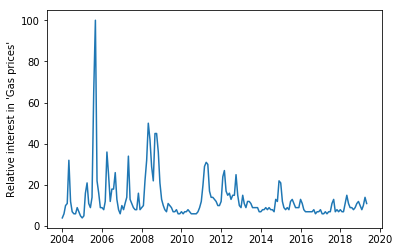

In [34]:
plt.plot(interest_df[kw])
plt.ylabel('Relative interest in \'{}\''.format(kw))
plt.show()

We see that the most queried period of time for 'Gas prices' was in 2005 with a second after the recession in 2008.

#### Using related queries as feedback to get more data

Google trends also provides keywords that it thinks are relevant to the provided keyword. This is useful because we can gather multiple keywords' worth of data and combine them to reduce the variance in any one search result.

In [26]:
def get_related_for_keyword(kw):
    kw_list = [kw]
    pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='US', gprop='')
    related_df = pytrends.interest_over_time()
    return pytrends.related_queries()

In [27]:
# Modify these to grow the size of the tree and to choose a different starting keyword
start_kw = 'Gas prices'
num_iters = 5
k = 3 # Top-k related keywords to find per word


graph_dict = {}
q = deque()
q.append(start_kw)

for i in range(num_iters):
    # get the next keyword
    kw = q.popleft()
    print("Finding related terms to {}...".format(kw))
    
    # Get related keywords for given keyword
    related = get_related_for_keyword(kw)

    # Get the top k related keywords
    top_k = list(related[kw]['top'][:k]['query'].values)
    
    # Add to graph data dict
    if kw not in graph_dict:
        graph_dict[kw] = []
    graph_dict[kw] = top_k
    
    q.extend(top_k)
print("Done")

Finding related terms to Gas prices...
Finding related terms to gas near me...
Finding related terms to gas prices near me...
Finding related terms to gas price...
Finding related terms to near me gas station...
Done


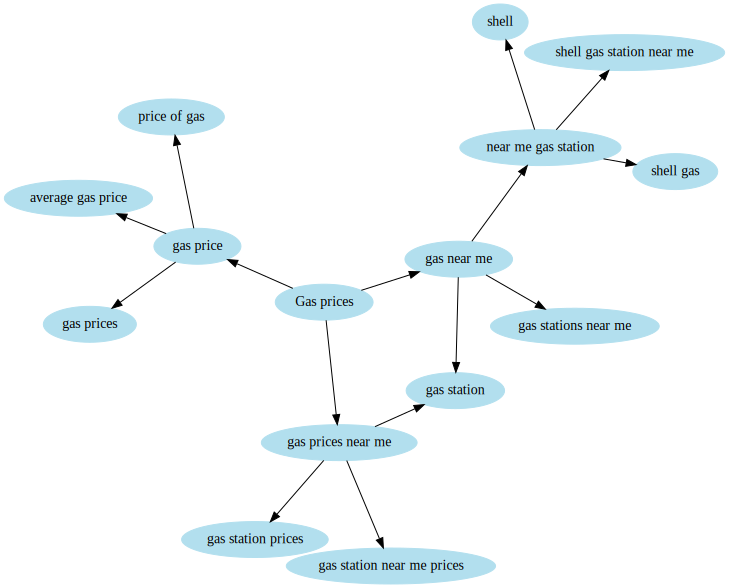

In [28]:
dot = Digraph(engine='neato')
dot.node_attr.update(color='lightblue2', style='filled')
dot.edge_attr.update(len='1.6')

for kw in graph_dict:
    dot.node(kw, kw)
    for child in graph_dict[kw]:
        dot.node(child, child)
        dot.edge(kw, child, length='1')
dot

From this graph, we can use any of the suggested keywords in combination with the existing keyword. We didn't include this in the project as it is somewhat tangential but this can be included in a future iteration that focuses more explicitly on the relationship between google trends data and gas prices.

## ARIMA

## Automatic Parameter Selection

## Cross Correlation

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*